# Government Demand Shock

In [187]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup

In [188]:
model = BabyMAKROModelClass(name='Extended')

In [189]:
par = model.par
ss = model.ss
sol = model.sol

# Find steady state and Jacobian


In [190]:
model.find_ss(do_print=True)

Labor supply and search and matching:
ss.S = 4.24,  ss.L = 57.88,  ss.delta_L = 0.04,  ss.v = 9.41,  ss.m_v = 0.23
Capital agency FOC:
ss.r_K = 0.14
Production firm pricing:
ss.r_ell = 2.71
Labor agency:
ss.ell = 57.51,  ss.W = 2.68
Government:
ss.B_G = 100.00,  ss.G = 61.82,  ss.tau = 0.42
Households:
solving for household behavior: result.converged = True
ss.C = 79.33,  ss.B = 161.32
Production firm FOCs:
ss.K = 573.77
Capital accumulation equation:
ss.I = 57.38
Output in production firm:
ss.Y = 236.29
Market clearing:
ss.C_Y = 55.53,  ss.G_Y = 55.64,  ss.I_Y = 37.29,  ss.X_Y = 87.83
[ ss.C_M = 23.80,  ss.G_M = 6.18,  ss.I_M = 20.08,  ss.X_M = 58.55 ] = ss.M = 108.61
ss.X = 146.38
Bargaining:
par.phi = 0.981


In [191]:
model.calc_jac(do_print=True)

Jacobian calculated in 40.6 secs secs


# Find IRF

In [192]:
model.set_exo_ss()

In [193]:
Gshock = 50
shock = 0.01*ss.G
persistence = 0.80**np.arange(Gshock)
sol.G[:Gshock] = ss.G + shock*persistence

In [194]:
model.set_unknowns_ss()
model.evaluate_blocks()
errors = model.get_errors(do_print=True)

bargaining_cond     : abs. max = 0.00e+00
Bq_match            : abs. max = 1.66e+00
FOC_capital_agency  : abs. max = 3.33e-16
FOC_K_ell           : abs. max = 2.49e-14
mkt_clearing        : abs. max = 5.56e-01


In [195]:
model.find_IRF()

initial:
   max. abs. error = 1.66e+00
    0.00e+00 in bargaining_cond
    1.66e+00 in Bq_match
    3.33e-16 in FOC_capital_agency
    2.49e-14 in FOC_K_ell
    5.56e-01 in mkt_clearing

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 1.66e+00
    8.38e-06 in bargaining_cond
    3.51e-03 in Bq_match
    4.46e-06 in FOC_capital_agency
    2.74e-04 in FOC_K_ell
    3.46e-03 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.1 secs
   max. abs. error = 3.51e-03
    3.84e-07 in bargaining_cond
    1.11e-04 in Bq_match
    2.90e-07 in FOC_capital_agency
    1.18e-05 in FOC_K_ell
    1.37e-04 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 1.37e-04
    1.40e-08 in bargaining_cond
    2.89e-06 in Bq_match
    1.27e-08 in FOC_capital_agency
    4.48e-07 in FOC_K_ell
    5.28e-06 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

# Figures

## National accouting - quantities

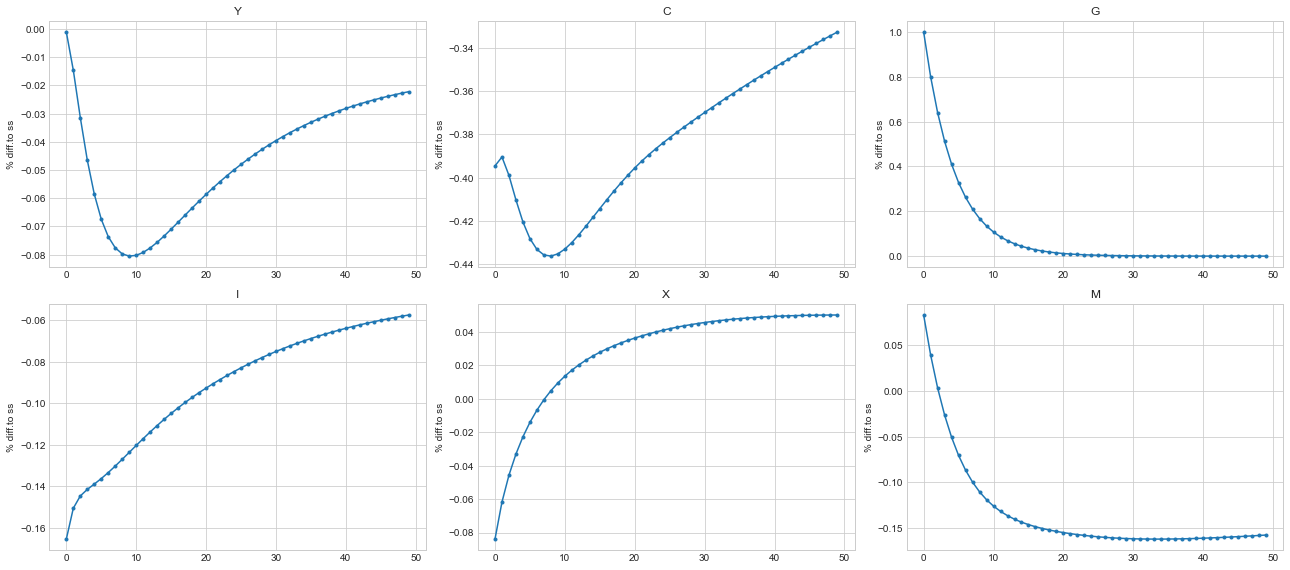

In [196]:
model.plot_IRF(varlist=['Y','C','G','I','X','M'])

## National Accouting - Prices

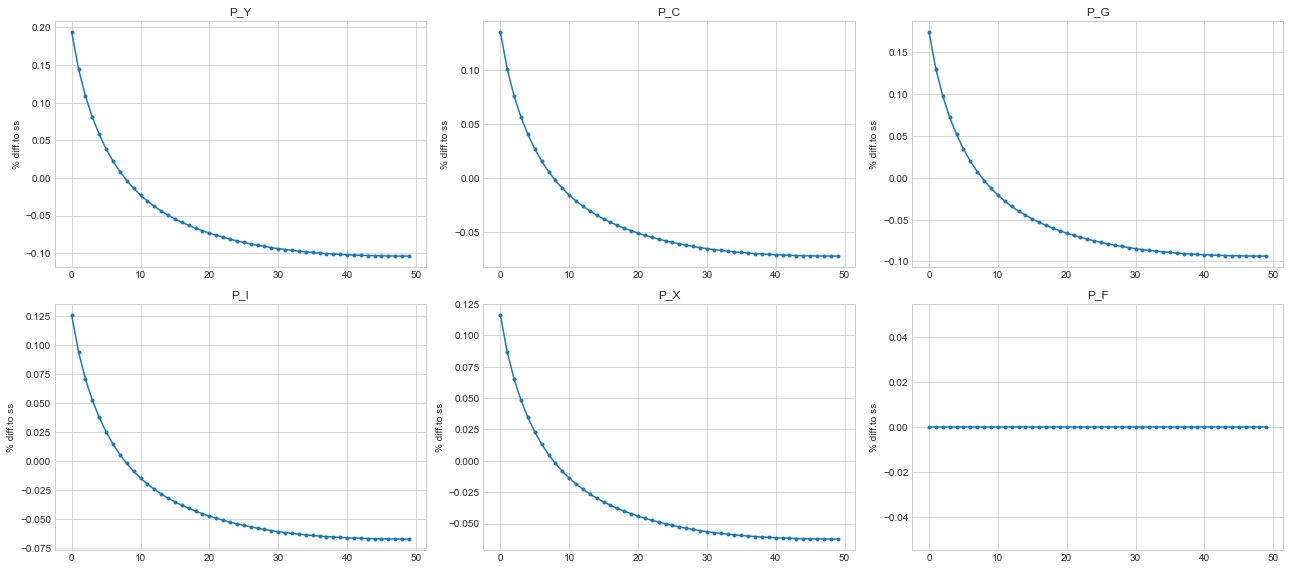

In [197]:
model.plot_IRF(varlist=['P_Y','P_C','P_G','P_I','P_X','P_F'])

## Labor market

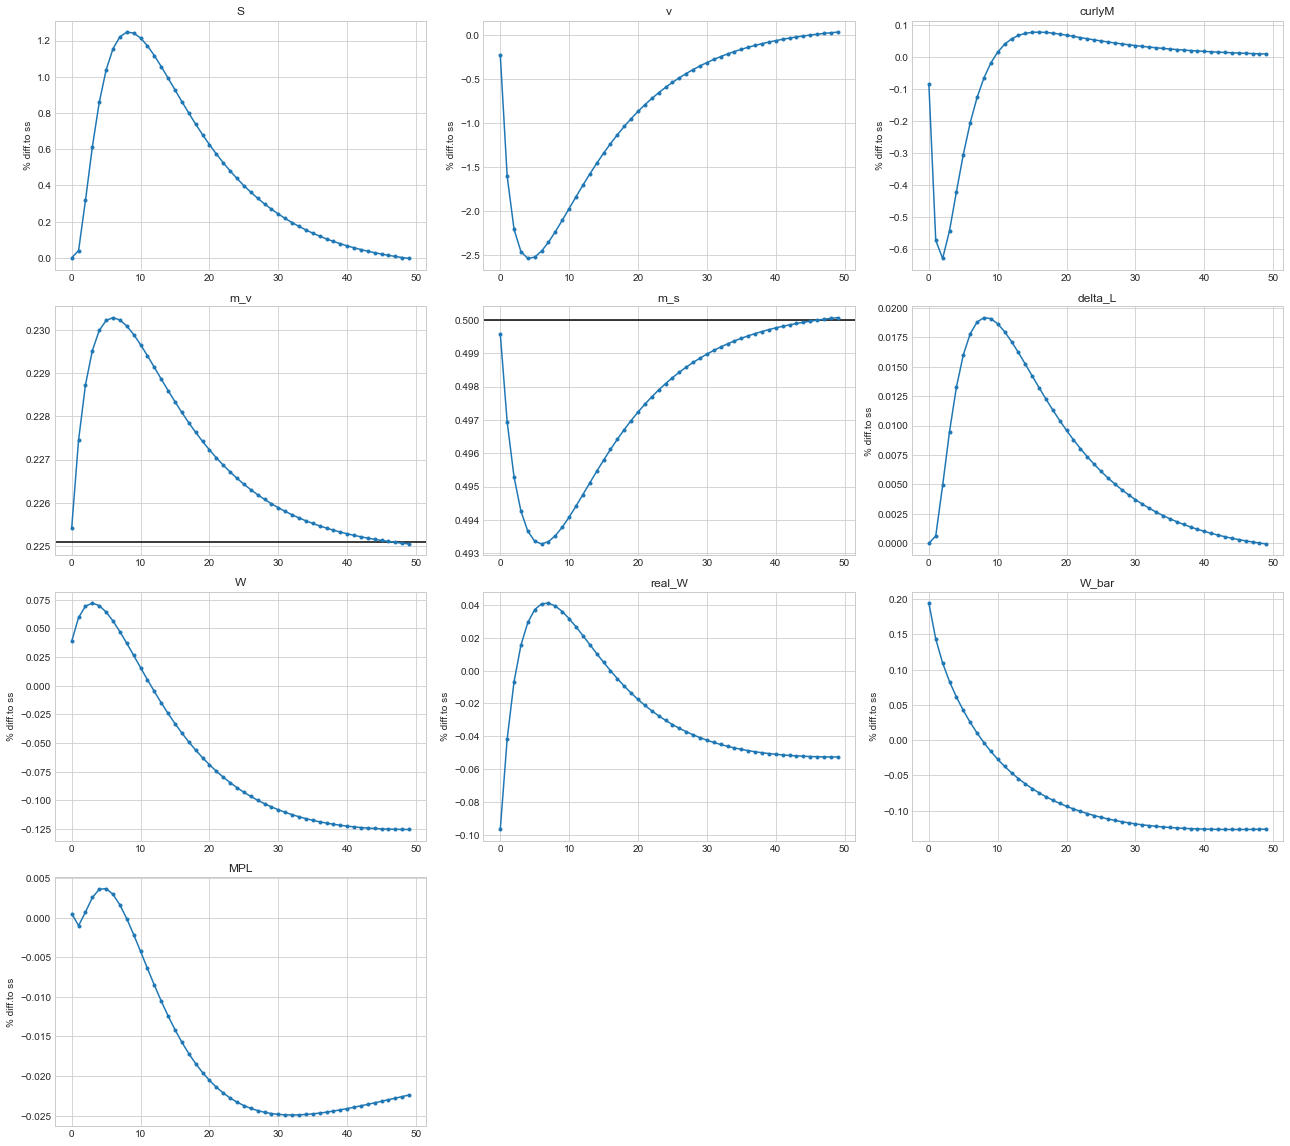

In [198]:
model.plot_IRF(varlist=['S','v','curlyM','m_v','m_s','delta_L','W','real_W','W_bar','MPL'],abs=['m_v','m_s'])

## Capital accumulation

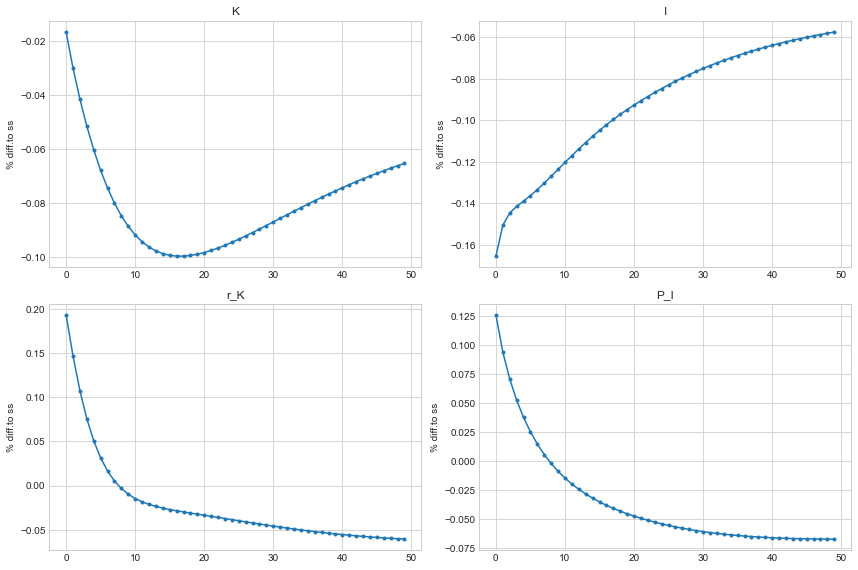

In [199]:
model.plot_IRF(varlist=['K','I','r_K','P_I'],ncol=2)

## Production firms

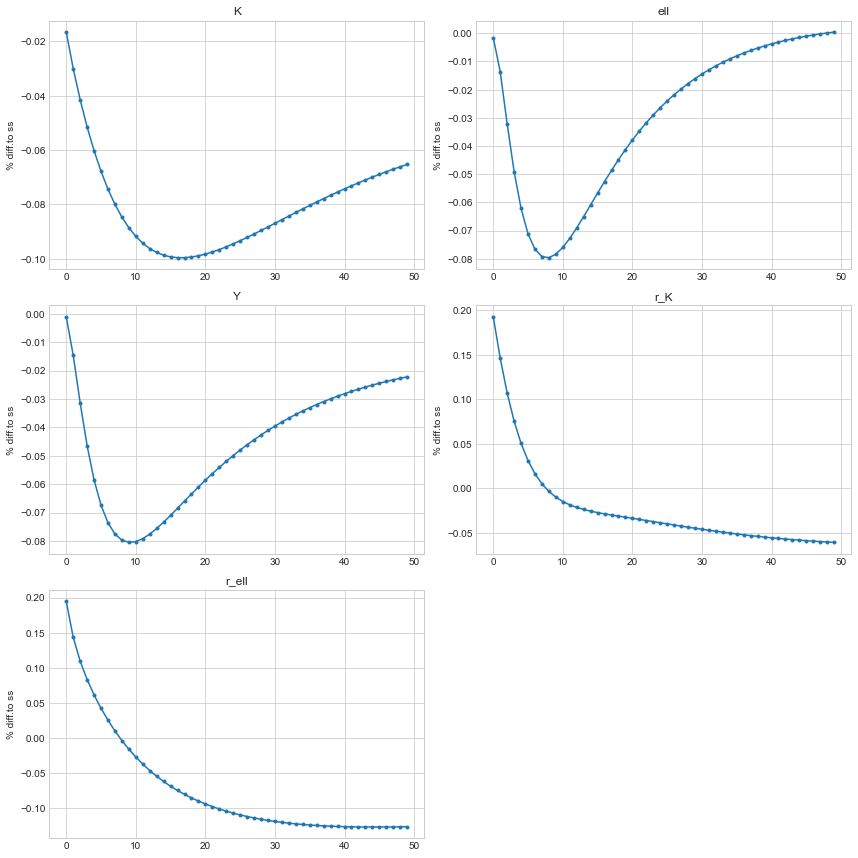

In [200]:
model.plot_IRF(varlist=['K','ell','Y','r_K','r_ell'],ncol=2)

## Government

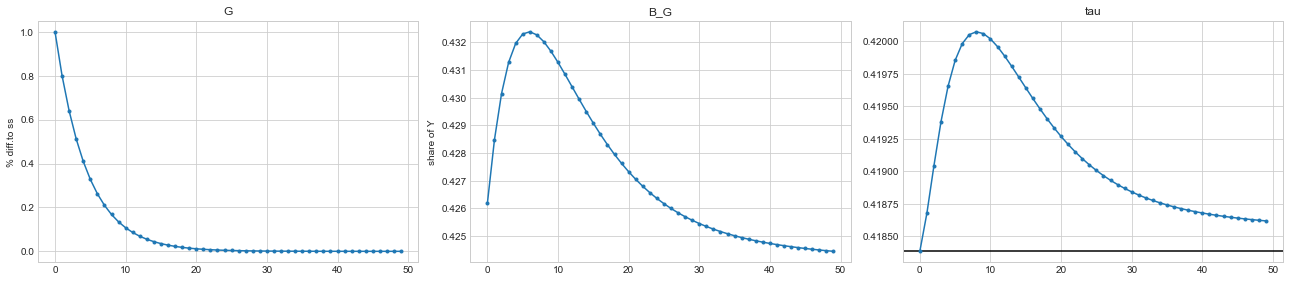

In [201]:
model.plot_IRF(varlist=['G','B_G','tau'],abs=['tau'],Y_share=['B_G'])

## Households - aggregate

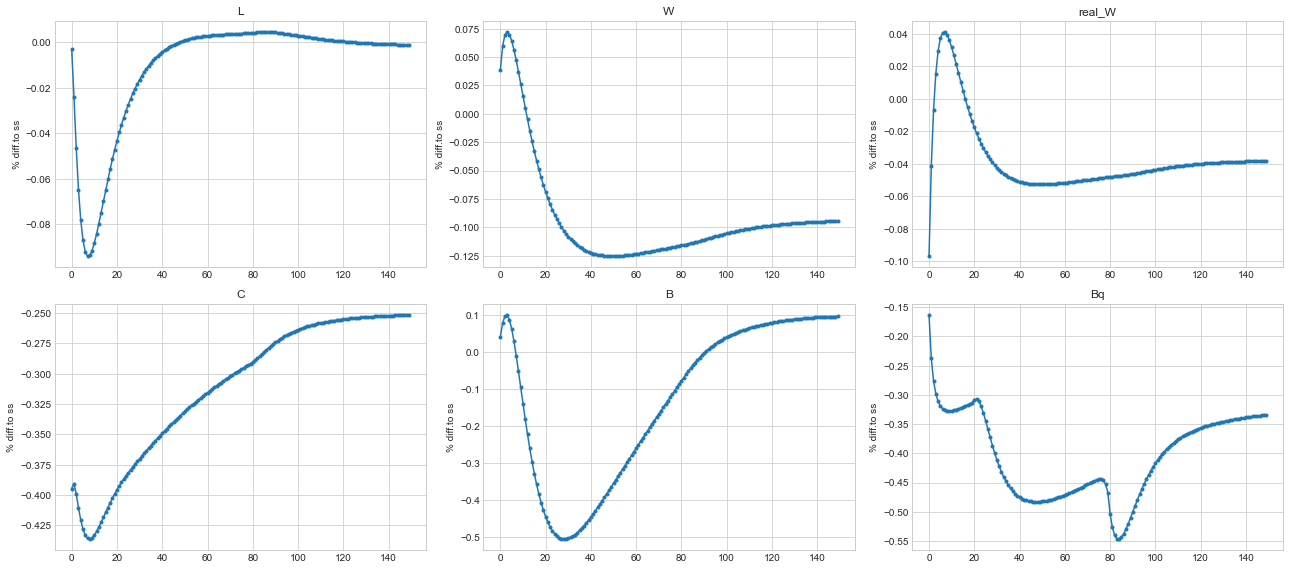

In [202]:
model.plot_IRF(varlist=['L','W','real_W','C','B','Bq'],ncol=3, T_IRF = 150)

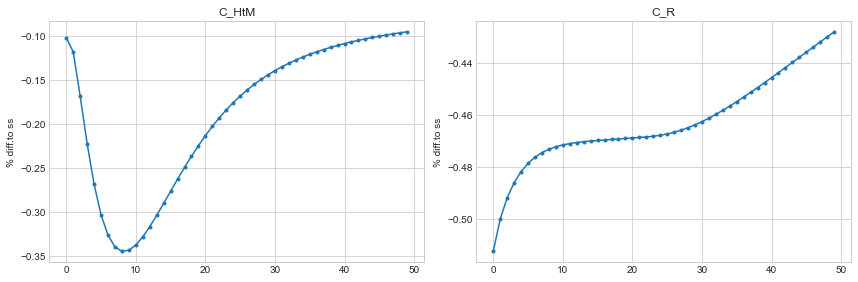

In [203]:
model.plot_IRF(varlist=['C_HtM','C_R'],ncol=2)

## Households - Life-cycle

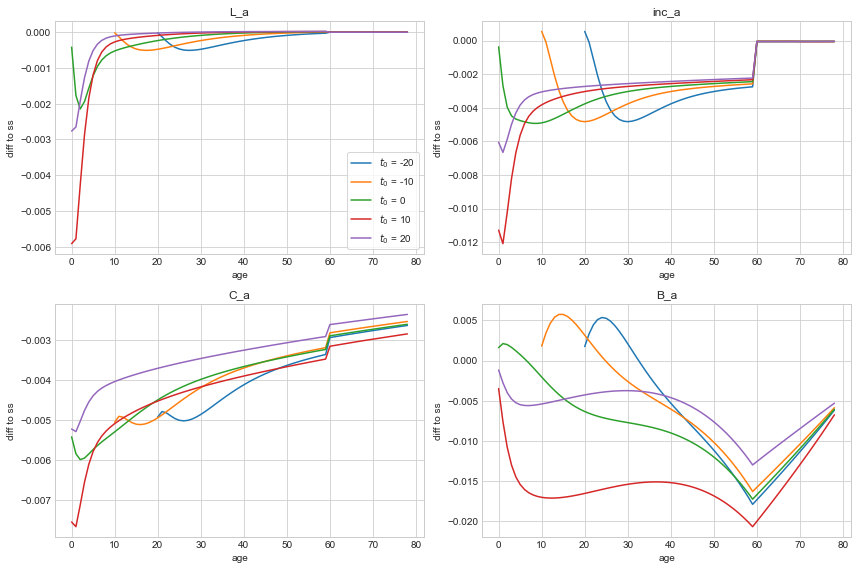

In [204]:
model.plot_IRF_hh(varlist=['L_a','inc_a','C_a','B_a'],t0_list=[-20,-10,0,10,20])